# Анализ продаж и факторов успеха видеоигр: исследование данных интернет-магазина 'Стримчик'

## ВВЕДЕНИЕ  
В рамках данного проекта мы анализируем данные интернет-магазина «Стримчик», который занимается продажей компьютерных игр по всему миру. Целью исследования является выявление закономерностей, определяющих успешность игр. Это позволит прогнозировать популярность продуктов и эффективно планировать рекламные кампании.

На основе данных о продажах игр, оценках пользователей и критиков, жанрах и платформах, мы проведем исследование, которое поможет понять, какие факторы влияют на продажи игр. Особое внимание будет уделено анализу продаж по регионам, изучению влияния возрастного рейтинга ESRB, а также проверке гипотез о пользовательских рейтингах различных платформ и жанров.  

**План исследования**  
  
  1. Изучение данных:
    - Открытие и изучение файла с данными, включающего информацию о продажах, оценках пользователей и критиков, жанрах и платформах.
    - Проведение предварительного анализа данных для выявления их структуры и качества.  
    
  
  2. Подготовка данных:
    - Приведение названий столбцов к нижнему регистру.
    - Преобразование данных в нужные типы и обработка пропусков.
    - Заполнение пропусков и объяснение выбранных методов обработки.
    - Обработка специального значения 'tbd' в столбце оценок пользователей.
    - Подсчет суммарных продаж по регионам и добавление нового столбца.

  
  3. Исследовательский анализ данных:
    - Анализ количества игр, выпущенных в разные годы, и их влияние на исследование.
    - Изучение изменений в продажах по платформам, определение актуального периода для анализа.
    - Оценка платформ с наибольшими суммарными продажами и построение распределения по годам.
    - Выявление тенденций и факторов, влияющих на продажи игр.

  
  4. Анализ влияния отзывов и жанров:
    - Построение графика «ящик с усами» для глобальных продаж по платформам.
    - Исследование влияния отзывов пользователей и критиков на продажи игр на популярной платформе.
    - Сравнение с продажами игр на других платформах и жанров.

  
  5. Составление портрета пользователя:
    - Определение самых популярных платформ и жанров в каждом регионе (NA, EU, JP).
    - Анализ влияния рейтинга ESRB на продажи в каждом регионе.

  
  6. Проверка гипотез:
    - Проверка гипотез о средних пользовательских рейтингах платформ и жанров.
    - Определение порогового значения alpha и применение соответствующих методов проверки гипотез.

  
  7. Общий вывод:
    - Составление итогового вывода на основе проведенного анализа.

Результаты исследования помогут интернет-магазину «Стримчик» оптимизировать ассортимент игр и стратегию продвижения на 2017 год.


### Шаг 1. Откройте файл с данными и изучите общую информацию

**Импортируем все библиотеки**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom, norm
from math import sqrt
from io import StringIO

**Сохраним датасет из файла `games.csv` в переменную `data` и выведим первые 20 строк датафрейма**

In [2]:
try:
    data = pd.read_csv('C:/Users/mmeln/projects/project4/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Очень хорошо, что используется код двойной загрузки, локально и с сервера. Часто в проектах возникают ошибки именно из-за не правильного пути к датасету.</font>

**Изучим общую информацию**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:**  
Датафрейм содержит 11 столбцов. Всего строк должно быть 16 715. Есть столбцы с пропущенными значениями:  
- Name;
- Year_of_Release;
- Genre;
- Critic_Score;
- User_Score;
- Rating.

Нужно сделать следующие операции:
1. Привести названия столбцов к единому стилю:
    - Name - name;
    - Platform - platform;
    - Year_of_Release - year_of_release;
    - Genre - genre;
    - NA_sales - na_sales;
    - EU_sales - eu_sales;
    - JP_sales - jp_sales;
    - Other_sales - other_sales;
    - Critic_Score - critic_score;
    - User_Score - user_score;
    - Rating - rating.

2. Преобразовать тип данных следующих столбцов:
    -  Year_of_Release - из типа `float64` в тип `int64`;
    -  Critic_Score - из типа `float64` в тип `int64`;

3. Проанализировать пропуски в данных.


### Шаг 2. Подготовьте данные

#### Заменим названия столбцов

In [4]:
data = data.rename(columns={
    'Name': 'name',
    'Platform': 'platform',
    'Year_of_Release': 'year_of_release',
    'Genre': 'genre',
    'NA_sales': 'na_sales',
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales',
    'Other_sales': 'other_sales',
    'Critic_Score': 'critic_score',
    'User_Score': 'user_score',
    'Rating': 'rating'
})
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Преобразуем тип данных столбцов `year_of_release` и `critic_score`

**До преобразования столбцов, необходимо обработать пропуски**

In [5]:
data['name'] = data['name'].replace('wwe Smackdown vs. Raw 2006', 'WWE SmackDown! vs. RAW 2006')

In [6]:
data['lower_name'] = data['name'].str.lower()
if len(data['lower_name'].unique()) == len(data['name'].unique()):
    print('Наименования игр уникальны и не зависят от регистра')
else:
    print('Одинаковые наименования игр записаны в разных регистрах')

Наименования игр уникальны и не зависят от регистра


In [7]:
data = data.drop(columns=['lower_name'])
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
round((data['year_of_release'].isna().sum() / len(data)) * 100, 2) 

1.61

Процент пропусков составляет всего 1.61%. 

**Удалим пропуски года релиза, так как процент пропусков маленький и составляет всего 1.61%. Удаление этих строк не должно существенно повлиять на результаты анализа.**

In [9]:
data = data.dropna(subset=['year_of_release'])

In [10]:
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


**Проверим, есть ли полные дубликаты в данных**

In [11]:
data.duplicated().sum()

0

In [12]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


**Вывод:**   

1. Наименования столбцов переведены в нижний регистр; 
2. Преобразован тип данных столбца `year_of_release` - из типа `float64` в тип `int64`;
3. Удалены пропуски столбца `year_of_release`, так как процент пропусков маленький и составляет всего 1.61%. Удаление этих строк не должно существенно повлиять на результаты анализа.
   
<!-- Для преобразования столбца `year_of_release`. В первом этапе, пропуски заполнялись с учетом того, что год релиза для данной игры уже присуттствовала для других платформ. В большинстве случаев год релиза для разных платформ совпадает, поэтому скопировали год и вставляли вместо пропуска с помощью цикла. Второй этап, проведен поиск года релиза игр в интернете, данные сохранены в csv файл и посредством этих данных были заполнены оставшиеся пропуски в основном датафрейме `data`. -->

#### Обработайте пропуски остальных столбцов

In [13]:
#Выведем еще раз общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


**Осталось заполнить пропуски `name`, `genre`, `user_score`, `rating`. Посмотрим строку с пропусками в столбце `name`**

In [14]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


**Так как строка с пропусками для жанра и имени всего лишь одна, а также в столбцах с оценками пользователей и критиков также стоит пропуск, то без вреда для дальнейшего анализа можно удалить данную строку.**

In [15]:
data = data.dropna(subset=['name', 'genre'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


**Заполнение пропусков в столбце `rating`**

In [16]:
data_rating_null = data.query('rating.isna()')
len(data_rating_null)

6676

In [17]:
data_rating = data.query('rating.notna()')
len(data_rating)

9767

In [18]:
for n in data_rating_null['name'].unique():
    # Получаем рейтинг для текущего названия игры
    ratings = data_rating.loc[data_rating['name'] == n, 'rating']
    # Проверяем, что есть хотя бы один рейтинг для данного названия
    if not ratings.empty:
        # Используем первый год выпуска (или другой метод, если есть несколько значений)
        rating = ratings.iloc[0]
        # Обновляем пропуски в 'year_of_release' в исходных данных
        data.loc[(data['name'] == n) & (data['rating'].isna()), 'rating'] = rating

#Проверим сколько нулевых значений осталось в столбце rating
data_rating_null = data.query('rating.isna()')
len(data_rating_null)

6259

**Оставшиеся пустые значения оставим как есть, так как ESRB выставляет рейтинги только для игр выпущенных для Канады и Северной Америки. Можно предположить, что игры с отсутствующими рейтингами не выпустились в этих регионах, поэтому для данных игр рейтинга нет.**

In [19]:
#data['rating'] = data['rating'].fillna('unknown')
#Выведем общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           10184 non-null  object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


**Посмотрим на количество пустых значений в столбце `critic_score`**

In [20]:
data['critic_score'].isna().sum()

8461

*Больше половины значений отсутствуют, поэтому во избежание искажений при анализе и обработке данных, заполнять значения медианой, средней или модой не стоит. Оставим значения NaN.*

**Взглянем на уникальные значения столбца `user_score`**

In [21]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Значения nan оставим как есть, во избежание искажений данных. Посмотрим поподробнее значение `tbd`. Значение `tbd` в столбце `user_score` означает "To Be Determined" (будет определено позже). Это означает, что на момент сбора данных пользовательская оценка ещё не была окончательно определена или опубликована. Заменим `tbd` на NaN для дальнейшей обработки. Так как NaN это тип float и в расчетах он не будет учитываться, а `tbd` это строка, поэтому при обработке данных возникнут ошибки**

In [22]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [23]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           10184 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [24]:
#data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['sum_sales'] = data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Проверим не появились ли пропуски в столбце `sum_sales`**

In [25]:
data['sum_sales'].isna().sum()

0

**Вывод:**   

1. Наименования столбцов переведены в нижний регистр; 
2. Преобразованы тип данных столбца `year_of_release` - из типа `float64` в тип `int64`; Удалены строки с пропусками столбца `year_of_release`, так как пропуски составляли всего лишь 1.6% от общего числа данных. Поэтому удаление этих данных не должно повлиять на дальнейший анализ.
3. Пропуск в столбцах `name`, `genre` был всего лишь один, поэтому данная строка была удалена.
4. Заполнена часть пропусков в столбце `rating` с учетом того, что рейтинг для данной игры уже присутствовал для других платформ. Оставшиеся пустые значения оставили как есть, так как ESRB выставляет рейтинги только для игр выпущенных для Канады и Северной Америки. Можно предположить, что игры с отсутствующими рейтингами не выпустились в этих регионах, поэтому для данных игр рейтинга нет..
5. В столбце `user_score` значения nan оставлены как есть, во избежание искажений данных. Обнаружено значение `tbd` ("To Be Determined" (будет определено позже)) в значениях данного столбца, что означает, что на момент сбора данных пользовательская оценка ещё не была окончательно определена или опубликована. Произведена замена `tbd` на NaN для дальнейшей обработки. Так как NaN это тип float и в расчетах он не будет учитываться, а `tbd` это строка, поэтому при обработке данных возникнут ошибки
6. В столбце `critic_score` больше половины значений отсутствуют, поэтому во избежание искажений при анализе и обработке данных, заполнять значения медианой, средней или модой не стоит. Оставлены значения NaN.
7. Посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец `sum_sales`.

Причины, которые могли привести к пропускам:  
- Отсутствие информации;
- Технические проблемы;
- Ошибки заполнения данных.

In [26]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           10184 non-null  object 
 11  sum_sales        16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

### Шаг 3. Проведите исследовательский анализ данных

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [27]:
data_years = data['year_of_release'].value_counts().sort_index()
data_years

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

**Построим столбчатую диаграмму**

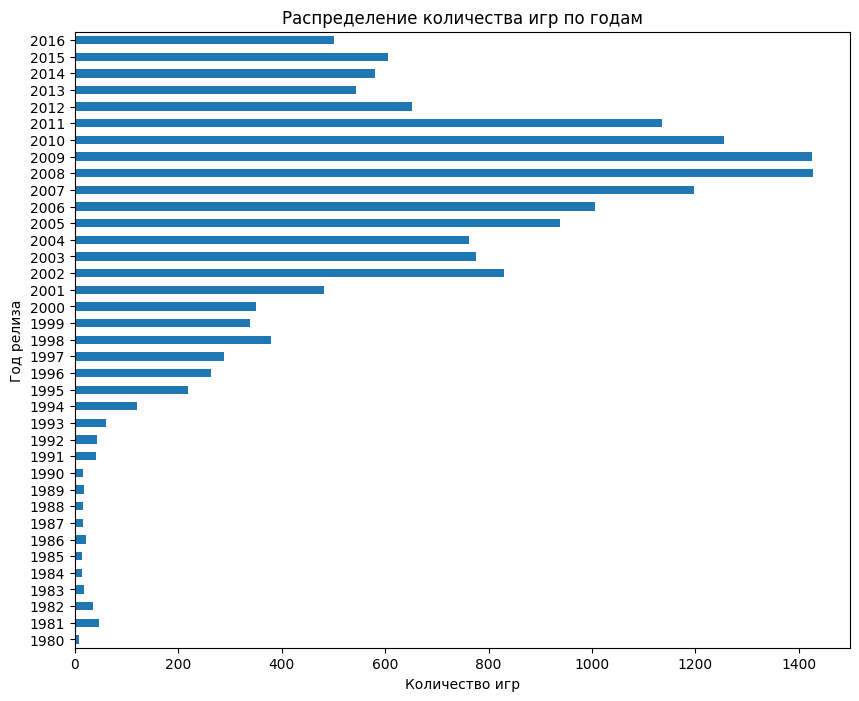

In [28]:
ax = data_years.plot(kind='barh', title='Распределение количества игр по годам', figsize=(10,8))
# Настройка заголовков осей
ax.set_xlabel('Количество игр')
ax.set_ylabel('Год релиза')
plt.show()

С начала 80-х годов наблюдается рост релиза игр, что может быть связано с увеличением развития технологий и распространением их среди населения. Начиная с 1990-го года наблюдается скачок в выпуске игр и до 1998 года тенденция только росла. С 1999 года наблюдается незначительный спад и начиная с 2000-го года резкий рост, особенно до 2009 года, что также связано с развитием интернет-платформ. Начиная с 2010-го и до 2016-го года наблюдается спад с колебаниями в релизе игр. Возможно это объясняется с тем, что волна популярности игр с течением времени падает.
В период с начала 00-х наблюдается рост индустрии игр, скорее всего данных по играм выпущенным в периоде с начала 2000 до 2016 гг больше, также для анализа трендов и тенденции в индустрии игр лучше ориентироваться на данные, которые охватывают период с 2000-х до 2016-х гг. Поэтому важный период для анализа данных является период с 2000-го до 2016-х гг.

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

**Создадим датафрейм `data_platform_sales` со сгруппированными значениями столбца `platform` и вычислим суммарную продажу.**

In [29]:
data_platform_sales = data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).reset_index()
data_platform_sales

,platform,sum_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


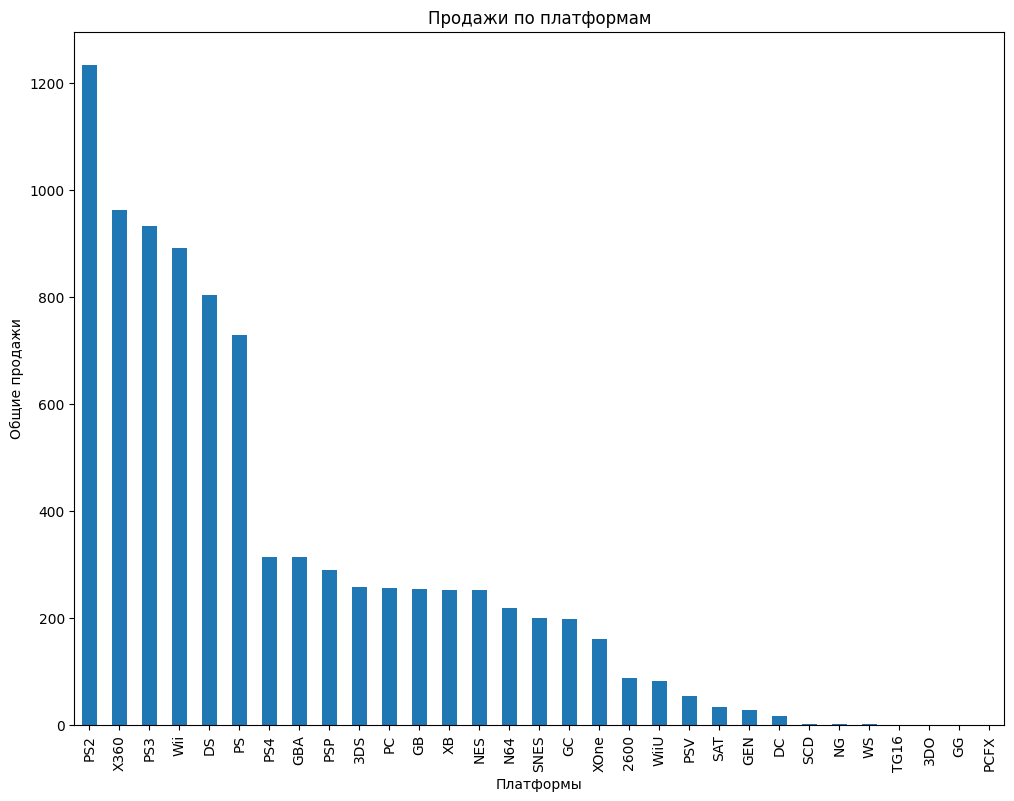

In [30]:
ax = data_platform_sales.plot(kind='bar',x='platform', y='sum_sales', title='Продажи по платформам', figsize=(12, 9), legend=False)
ax.set_xlabel('Платформы')
ax.set_ylabel('Общие продажи')
plt.show()

**Оставим платформы с суммарными продажами больше 700 млн копий**

In [31]:
data_platform_sales_top = data_platform_sales.query('sum_sales > 700')
data_platform_sales_top

,platform,sum_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58


**Сделаем срез данных и оставим только столбцы `platform`, `year_of_release`, `sum_sales`**

In [32]:
platform_sales_years = (data.query('platform in @data_platform_sales_top["platform"]')
                        .loc[:,['platform', 'year_of_release', 'sum_sales']]
                       )
platform_sales_years.head()

,platform,year_of_release,sum_sales
0,Wii,2006,82.54
2,Wii,2008,35.52
3,Wii,2009,32.77
6,DS,2006,29.80
7,Wii,2006,28.91


**Сделаем группировку по `platform` и `year_of_release`**

In [33]:
platform_sales_years_group = platform_sales_years.groupby(['platform', 'year_of_release'])['sum_sales'].sum()
platform_sales_years_group.head(60)

platform  year_of_release
DS        1985                 0.02
          2004                17.27
          2005               130.14
          2006               119.81
          2007               146.94
          2008               145.31
          2009               119.54
          2010                85.02
          2011                26.18
          2012                11.01
          2013                 1.54
PS        1994                 6.03
          1995                35.96
          1996                94.70
          1997               136.17
          1998               169.49
          1999               144.53
          2000                96.37
          2001                35.59
          2002                 6.67
          2003                 2.07
PS2       2000                39.17
          2001               166.43
          2002               205.38
          2003               184.31
          2004               211.81
          2005               160.66
  

**В  результате выведенного датафрейма на экран, можно заметить следующее:**  
Платформа DS появилась только в 2004 году, а в данных присутствует год релиза игры для данной платформы 1985. Это ошибка, поэтому отфильтруем данные, чтобы оставить только записи, где год релиза >= 2000 для платформы DS

In [34]:
platform_sales_years_filtered = platform_sales_years[~((platform_sales_years['platform'] == 'DS') & (platform_sales_years['year_of_release'] < 2000))]

In [35]:
platform_sales_years_group_filtered = platform_sales_years_filtered.groupby(['platform', 'year_of_release'])['sum_sales'].sum()
platform_sales_years_group_filtered.head(60)

platform  year_of_release
DS        2004                17.27
          2005               130.14
          2006               119.81
          2007               146.94
          2008               145.31
          2009               119.54
          2010                85.02
          2011                26.18
          2012                11.01
          2013                 1.54
PS        1994                 6.03
          1995                35.96
          1996                94.70
          1997               136.17
          1998               169.49
          1999               144.53
          2000                96.37
          2001                35.59
          2002                 6.67
          2003                 2.07
PS2       2000                39.17
          2001               166.43
          2002               205.38
          2003               184.31
          2004               211.81
          2005               160.66
          2006               103.42
  

**Построим распределение по годам**

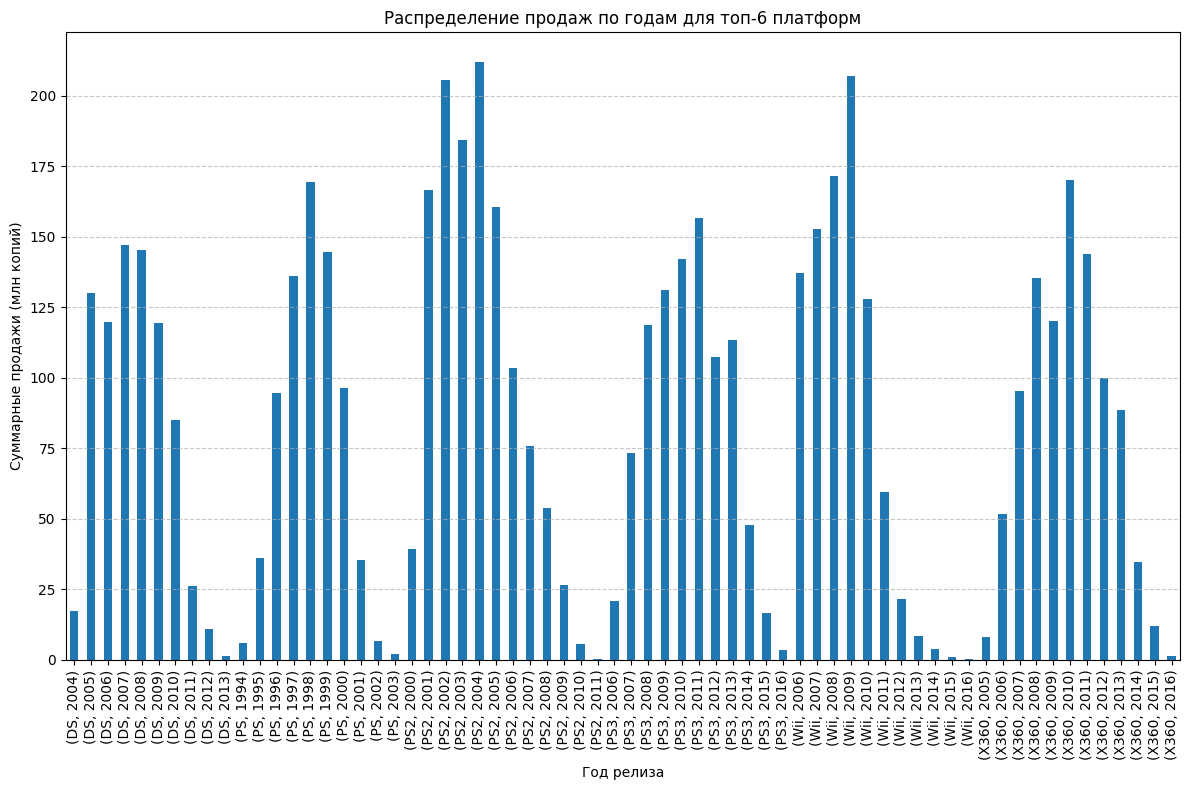

In [36]:
plt.figure(figsize=(12, 8))
platform_sales_years_group_filtered.plot(kind='bar', title='Распределение продаж по годам для топ-6 платформ')
plt.xlabel('Год релиза')
plt.ylabel('Суммарные продажи (млн копий)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [37]:
(data.query('platform == "PS4"')
                        .loc[:,['platform', 'year_of_release', 'sum_sales']]
                        .groupby(['platform', 'year_of_release'])['sum_sales'].sum()
                       )

platform  year_of_release
PS4       2013                25.99
          2014               100.00
          2015               118.90
          2016                69.25
Name: sum_sales, dtype: float64

Популярные платформы держатся на рынке около 7 лет. 
Если посмотреть поколение Playstation, то можно заметить следующий срок использования:
1. PS 1994-2003;
2. PS2 1998-2011;
3. PS3 1991-2016;
4. PS4 2013-2016
PS2 появился впервые в 2000-м году, а PS3 в 2006-м году.
Получается примерно каждые 7 лет, появляется новая версия PS. После появления новой версии, предыдущие версии продолжают существовать еще около 5 лет.
Пик продаж для платформ наблюдается на 3-5 годы после выпуска на рынок.

В связи с тем, что на рынке появился PS4, и сделав выводы о тенденции пика продаж для платформ, то можно сделать вывод, что топ продаж для этой платформы ожидается на 2017 год. Актуальный период с 2013 по 2016 годы.


In [38]:
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [39]:
data_actual = data.query('year_of_release >= 2012')
data_actual.sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
9674,Sleeping Dogs,PC,2012,Action,0.06,0.05,0.00,0.01,81.0,8.2,M,0.12
16298,Turbo Trainz,Wii,2012,Racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
8894,Deponia,PC,2012,Adventure,0.00,0.13,0.00,0.02,74.0,8.2,NaN,0.15
3260,Toshochu: Run for Money,3DS,2012,Adventure,0.00,0.00,0.62,0.00,NaN,NaN,NaN,0.62
3280,Scribblenauts: Unlimited,3DS,2012,Action,0.56,0.01,0.00,0.05,73.0,7.4,E10+,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...
12969,Dead or Alive Xtreme 3: Fortune,PS4,2016,Sports,0.00,0.00,0.05,0.00,43.0,7.8,NaN,0.05
13000,Dead Island Definitive Collection,XOne,2016,Action,0.02,0.03,0.00,0.00,67.0,4.9,M,0.05
13037,Teenage Mutant Ninja Turtles: Mutants in Manha...,PS3,2016,Action,0.01,0.03,0.00,0.01,NaN,3.4,T,0.05
13110,Utawarerumono: Futari no Hakuoro,PS4,2016,Misc,0.00,0.00,0.05,0.00,NaN,NaN,NaN,0.05


In [40]:
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2885 non-null   object 
 1   platform         2885 non-null   object 
 2   year_of_release  2885 non-null   int32  
 3   genre            2885 non-null   object 
 4   na_sales         2885 non-null   float64
 5   eu_sales         2885 non-null   float64
 6   jp_sales         2885 non-null   float64
 7   other_sales      2885 non-null   float64
 8   critic_score     1311 non-null   float64
 9   user_score       1530 non-null   float64
 10  rating           1757 non-null   object 
 11  sum_sales        2885 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 281.7+ KB


**Прибыльные платформы за актуальный период**

In [41]:
top_platforms_years = data_actual.groupby(['platform', 'year_of_release'])['sum_sales'].sum()
top_platforms_years

platform  year_of_release
3DS       2012                51.36
          2013                56.57
          2014                43.76
          2015                27.78
          2016                15.14
DS        2012                11.01
          2013                 1.54
PC        2012                23.22
          2013                12.38
          2014                13.28
          2015                 8.52
          2016                 5.25
PS3       2012               107.35
          2013               113.25
          2014                47.76
          2015                16.82
          2016                 3.60
PS4       2013                25.99
          2014               100.00
          2015               118.90
          2016                69.25
PSP       2012                 7.69
          2013                 3.14
          2014                 0.24
          2015                 0.12
PSV       2012                16.19
          2013                10.59
  

In [42]:
top_platforms = data_actual.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)
top_platforms

platform
PS4     314.14
PS3     288.78
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: sum_sales, dtype: float64

Топ 5 платформ - это PS4, PS3, X360, 3DS, XOne.  
1. Доходы растут у  PS4, XOne. Так как они недавно появились на рынке.
2. Доходы падают у PS3, X360, 3DS. Так как они давно на рынке.

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

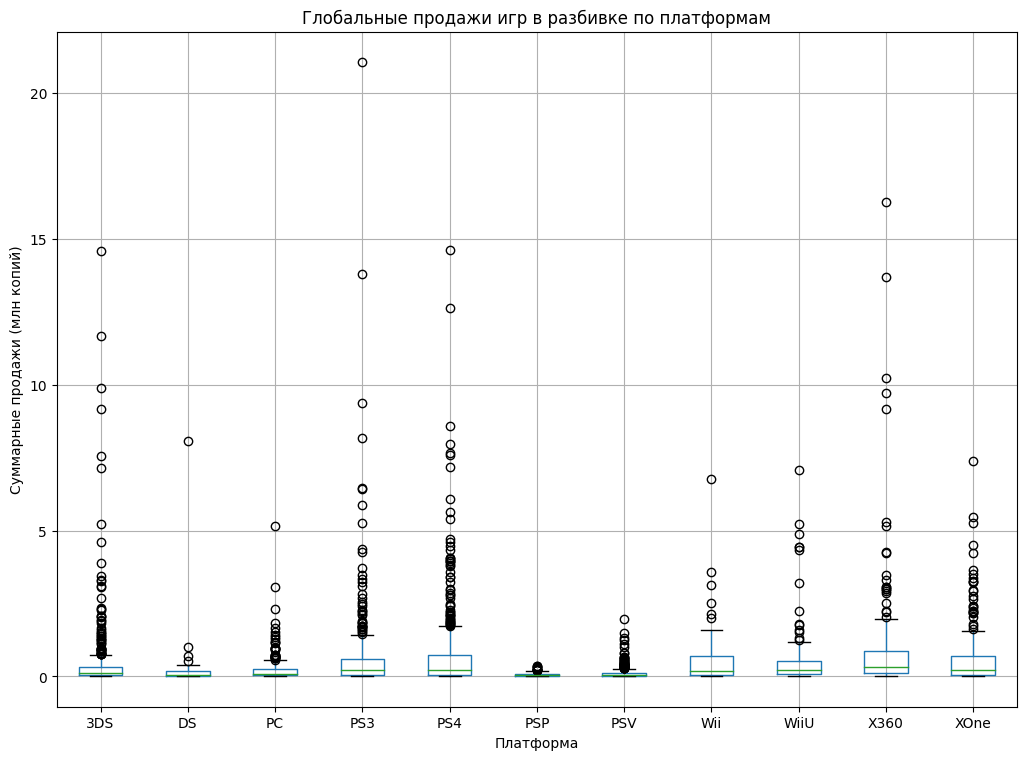

In [43]:
data_actual.boxplot(column = 'sum_sales', by='platform', figsize=(12, 9))
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.suptitle('')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн копий)')
plt.show()

**Дополнительно выведем график с диапазоном `y` от 0 до 2.**

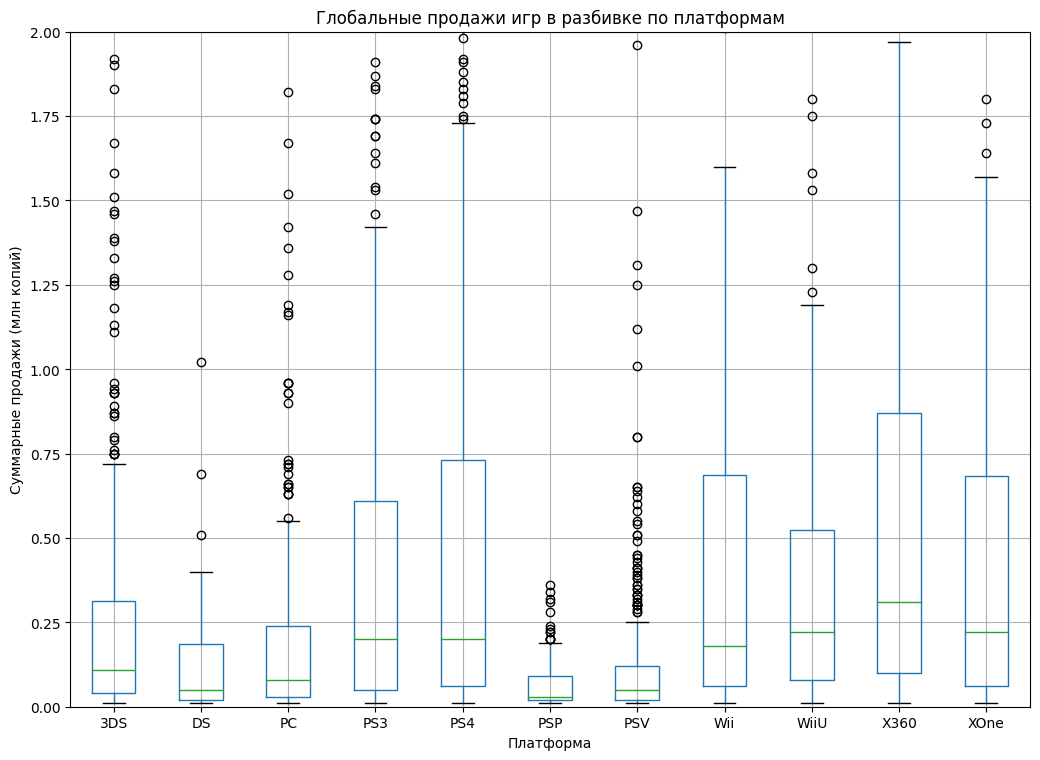

In [44]:
data_actual.boxplot(column = 'sum_sales', by='platform', figsize=(12, 9))
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.suptitle('')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн копий)')
plt.ylim(0, 2)
plt.show()

In [45]:
data_actual.groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,492.0,0.586951,1.464113,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


В результате проделанных операций, было выяснено, следующее: 
1. Для всех платформ минимальные продажи совпадают = 10 тыс. копий. Это говорит о том, что на каждой платформе были игры, которые практически не продавались.
2. По продажам лидирует PS3 - максимальная продажа составляет 21.05 млн.,далее следует X360 c 16.27 млн. и на третьем месте PS4 с 14.63 млн., хотя на рынке он появился позднее остальных.
3. По средним продажам лидирует PS4 около 800 тыс. продаж, далее Wii 654 тыс., PS3 585 тыс.
4. Медиана продаж значительно ниже среднего продаж: у X360 cо 310 тыс.,далее WiiU и XOne c 220 тыс. и наконец у PS3 и PS4 продажа составляет 200 тыс. Это свидетельствует о том, что есть игры и их продажи так высоки, что они тянут среднее наверх.
5. Большое количество выбросов на графике "ящик с усами" говорит о неравномерности продаж игр. Некоторые игры очень популярные, а некоторые нет.
6. Для 75% игр, большое количество продаж у платформы X360 870 тыс., Wii c 740 тыс., далее PS4 с 730 тыс. продаж, далее XOne 685 тыс., PS3 с 610 тыс. продаж. На платформах X360, Wii, и PS4 в 75% случаев наблюдаются более высокие продажи игр, чем на XOne и PS3. Это отражает более успешные продажи игр на первых трёх платформах по сравнению с другими.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы

**Выберем платформу X360**

In [46]:
platform_data_x360 = data_actual.query('platform == "X360"')
platform_data_x360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87.0,7.0,M,9.71
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
...,...,...,...,...,...,...,...,...,...,...,...,...
16450,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,NaN,4.5,E,0.01
16460,Young Justice: Legacy,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,6.2,T,0.01
16491,Ride,X360,2015,Racing,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16613,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01


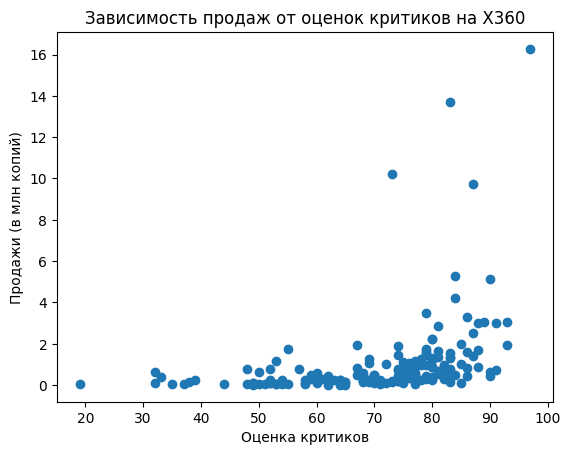

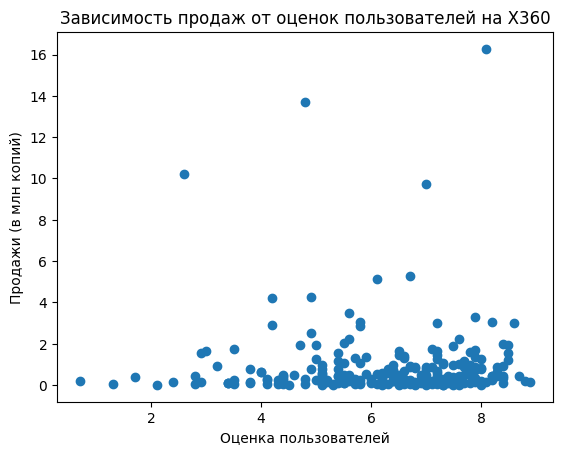

Корреляция между продажами и оценками критиков: 0.36057348885073387
Корреляция между продажами и оценками пользователей: 0.006163978646213367


In [47]:
# Диаграмма рассеяния для критиков
plt.scatter(platform_data_x360['critic_score'], platform_data_x360['sum_sales'])
plt.title('Зависимость продаж от оценок критиков на X360')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи (в млн копий)')
plt.show()

# Диаграмма рассеяния для пользователей
plt.scatter(platform_data_x360['user_score'], platform_data_x360['sum_sales'])
plt.title('Зависимость продаж от оценок пользователей на X360')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи (в млн копий)')
plt.show()

# Коэффициенты корреляции
correlation_critic = platform_data_x360['critic_score'].corr(platform_data_x360['sum_sales'])
correlation_user = platform_data_x360['user_score'].corr(platform_data_x360['sum_sales'])

print(f'Корреляция между продажами и оценками критиков: {correlation_critic}')
print(f'Корреляция между продажами и оценками пользователей: {correlation_user}')

**Вывод:**
1. Корреляция между продажами и оценками критиков 0.36 является положительной, но не сильной, что говорит о том, что есть умеренная связь между оценками критиков и покупки игр на основе оценки критиков.
2. Корреляция между продажами и оценками пользователей еще ниже и составляет всего 0.006. Корреляция является положительной, но очень слабой, что говорит о том, практически нету связи между оценками пользователей и покупки.
   Таким образом, оценки критиков имеют более значительное влияние на продажи игр, чем оценки пользователей, хотя обе связи положительные, но не сильные. Это может свидетельствовать о том, что другие факторы играют важную роль в определении уровня продаж.

**Соотнесите выводы с продажами игр на других платформах.**

In [48]:
platform_data_xone = data_actual.query('platform == "XOne"')
platform_data_xone.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


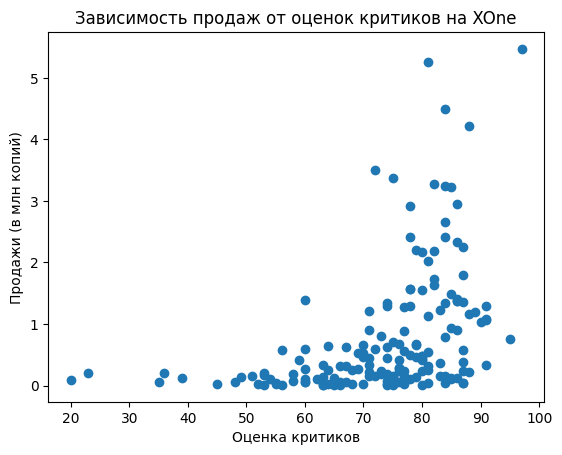

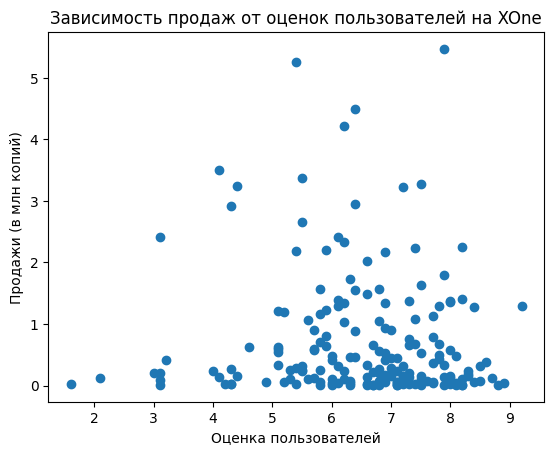

Корреляция между продажами и оценками критиков: 0.41699832800840153
Корреляция между продажами и оценками пользователей: -0.0689250532827942


In [49]:
# Диаграмма рассеяния для критиков
plt.scatter(platform_data_xone['critic_score'], platform_data_xone['sum_sales'])
plt.title('Зависимость продаж от оценок критиков на XOne')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи (в млн копий)')
plt.show()

# Диаграмма рассеяния для пользователей
plt.scatter(platform_data_xone['user_score'], platform_data_xone['sum_sales'])
plt.title('Зависимость продаж от оценок пользователей на XOne')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи (в млн копий)')
plt.show()

# Коэффициенты корреляции
correlation_critic = platform_data_xone['critic_score'].corr(platform_data_xone['sum_sales'])
correlation_user = platform_data_xone['user_score'].corr(platform_data_xone['sum_sales'])

print(f'Корреляция между продажами и оценками критиков: {correlation_critic}')
print(f'Корреляция между продажами и оценками пользователей: {correlation_user}')

In [50]:
platform_data_ps4 = data_actual.query('platform == "PS4"')
platform_data_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


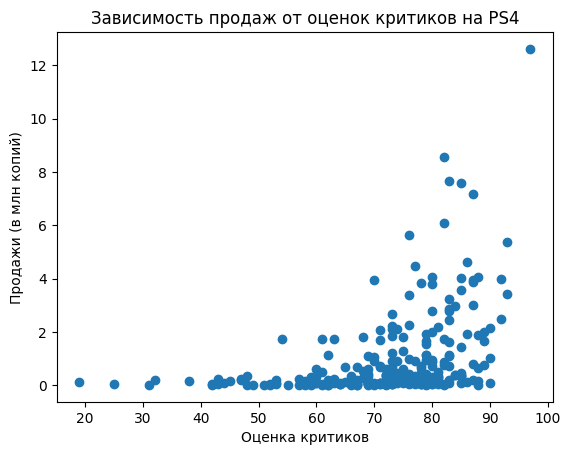

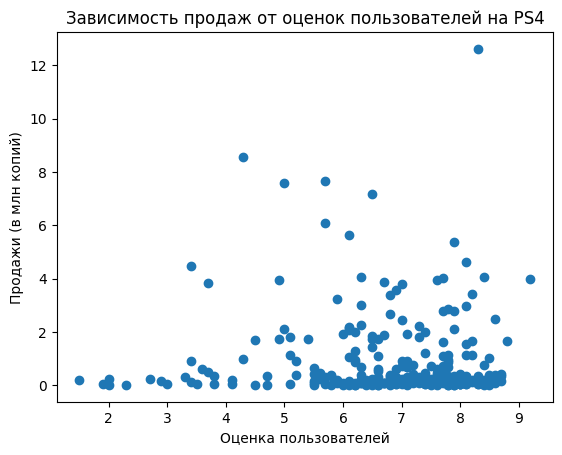

Корреляция между продажами и оценками критиков: 0.4065679020617813
Корреляция между продажами и оценками пользователей: -0.031957110204556466


In [51]:
# Диаграмма рассеяния для критиков
plt.scatter(platform_data_ps4['critic_score'], platform_data_ps4['sum_sales'])
plt.title('Зависимость продаж от оценок критиков на PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи (в млн копий)')
plt.show()

# Диаграмма рассеяния для пользователей
plt.scatter(platform_data_ps4['user_score'], platform_data_ps4['sum_sales'])
plt.title('Зависимость продаж от оценок пользователей на PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи (в млн копий)')
plt.show()

# Коэффициенты корреляции
correlation_critic = platform_data_ps4['critic_score'].corr(platform_data_ps4['sum_sales'])
correlation_user = platform_data_ps4['user_score'].corr(platform_data_ps4['sum_sales'])

print(f'Корреляция между продажами и оценками критиков: {correlation_critic}')
print(f'Корреляция между продажами и оценками пользователей: {correlation_user}')

In [52]:
platform_data_ps3 = data_actual.query('platform == "PS3"')
platform_data_ps3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46


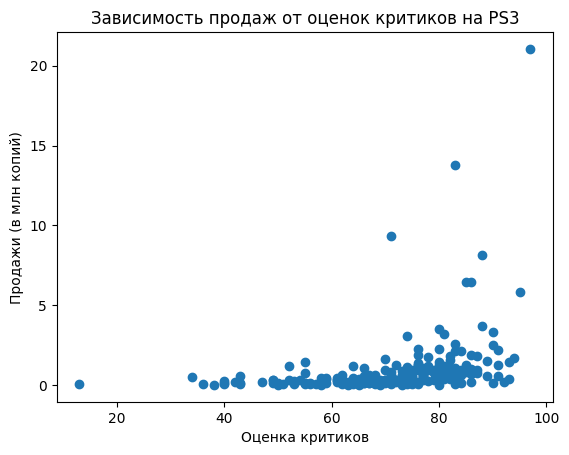

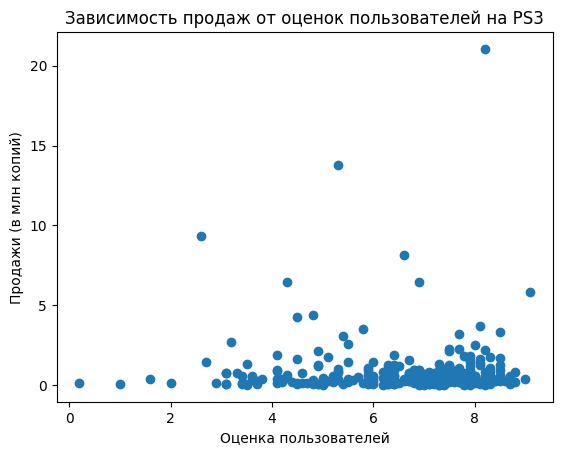

Корреляция между продажами и оценками критиков: 0.3341517575509854
Корреляция между продажами и оценками пользователей: -0.006205767686051528


In [53]:
# Диаграмма рассеяния для критиков
plt.scatter(platform_data_ps3['critic_score'], platform_data_ps3['sum_sales'])
plt.title('Зависимость продаж от оценок критиков на PS3')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи (в млн копий)')
plt.show()

# Диаграмма рассеяния для пользователей
plt.scatter(platform_data_ps3['user_score'], platform_data_ps3['sum_sales'])
plt.title('Зависимость продаж от оценок пользователей на PS3')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи (в млн копий)')
plt.show()

# Коэффициенты корреляции
correlation_critic = platform_data_ps3['critic_score'].corr(platform_data_ps3['sum_sales'])
correlation_user = platform_data_ps3['user_score'].corr(platform_data_ps3['sum_sales'])

print(f'Корреляция между продажами и оценками критиков: {correlation_critic}')
print(f'Корреляция между продажами и оценками пользователей: {correlation_user}')

In [54]:
platform_data_wii = data_actual.query('platform == "Wii"')
platform_data_wii.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
116,Just Dance 4,Wii,2012,Misc,4.05,2.16,0.00,0.55,74.0,7.3,E10+,6.76
359,Just Dance 2014,Wii,2013,Misc,1.88,1.39,0.00,0.31,NaN,6.2,E10+,3.58
439,Mario Party 9,Wii,2012,Misc,1.06,1.09,0.76,0.22,73.0,6.8,E,3.13
614,Skylanders Giants,Wii,2012,Action,1.48,0.83,0.00,0.21,78.0,7.0,E10+,2.52
766,Skylanders SWAP Force,Wii,2013,Platform,1.21,0.75,0.00,0.19,NaN,6.6,E10+,2.15


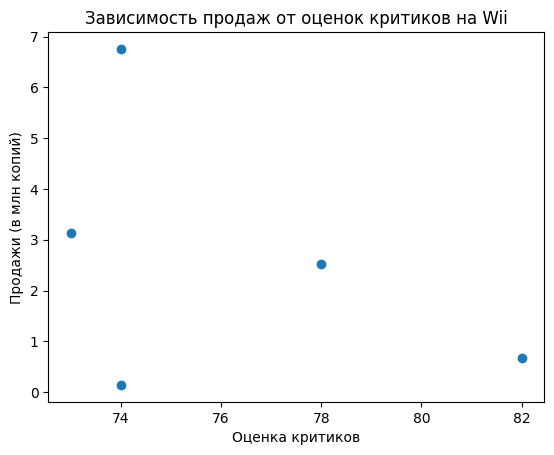

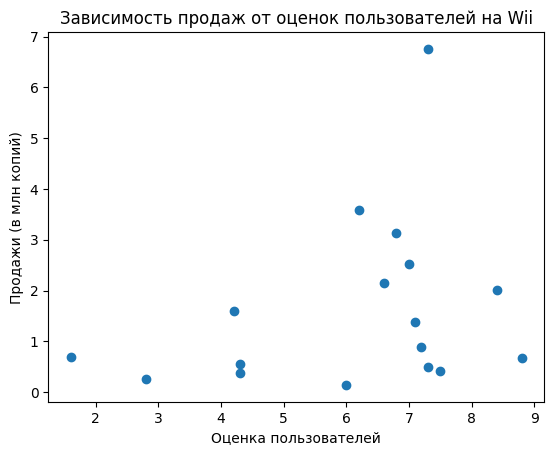

Корреляция между продажами и оценками критиков: -0.42434130110774954
Корреляция между продажами и оценками пользователей: 0.29619680007479526


In [55]:
# Диаграмма рассеяния для критиков
plt.scatter(platform_data_wii['critic_score'], platform_data_wii['sum_sales'])
plt.title('Зависимость продаж от оценок критиков на Wii')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи (в млн копий)')
plt.show()

# Диаграмма рассеяния для пользователей
plt.scatter(platform_data_wii['user_score'], platform_data_wii['sum_sales'])
plt.title('Зависимость продаж от оценок пользователей на Wii')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи (в млн копий)')
plt.show()

# Коэффициенты корреляции
correlation_critic = platform_data_wii['critic_score'].corr(platform_data_wii['sum_sales'])
correlation_user = platform_data_wii['user_score'].corr(platform_data_wii['sum_sales'])

print(f'Корреляция между продажами и оценками критиков: {correlation_critic}')
print(f'Корреляция между продажами и оценками пользователей: {correlation_user}')

**Вывод:**
Оценки критиков, имеют положительное умеренное влияние на продажи на X360, XOne, PS3, PS4, чем на Wii, у которого наоборот наблюдается отрицательное умеренное влияние на продажи.
Оценки пользователей оказывают очень слабое положительное или слабое отрицательное влияние на продажи, которые можно не учитывать.
Практически на всех платформах наблюдается положительная умеренная связь между оценкой критиков и продажей игр, что говорит о том, что покупатели ориентируются на оценки критиков при покупке игр, но оценка не играет решающей роли при покупке.

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Сгруппируем данные по жанрам и сохраним в датафрейм `genre_sales`**

In [56]:
genre_sales = (data_actual.groupby('genre').agg({'sum_sales': ['sum', 'count', 'median']})
              .reset_index()
              )
genre_sales.columns = ['genre', 'sum_sales', 'game_count', 'median_sales']
genre_sales = genre_sales.sort_values(by='median_sales', ascending=False)
genre_sales

,genre,sum_sales,game_count,median_sales
8,Shooter,304.73,235,0.440
10,Sports,181.06,267,0.240
4,Platform,61.00,85,0.210
7,Role-Playing,192.80,370,0.140
6,Racing,53.50,115,0.140
2,Fighting,44.49,109,0.130
0,Action,441.12,1031,0.120
3,Misc,85.04,192,0.120
9,Simulation,35.12,80,0.120
11,Strategy,13.34,71,0.080


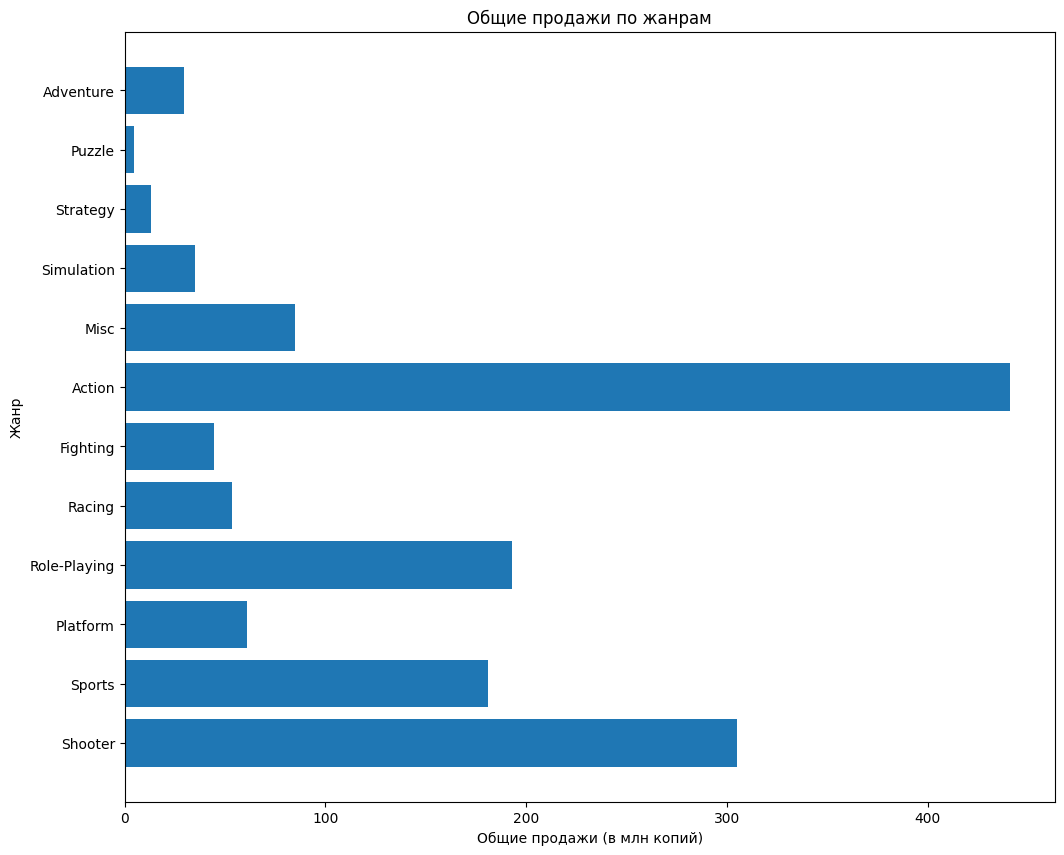

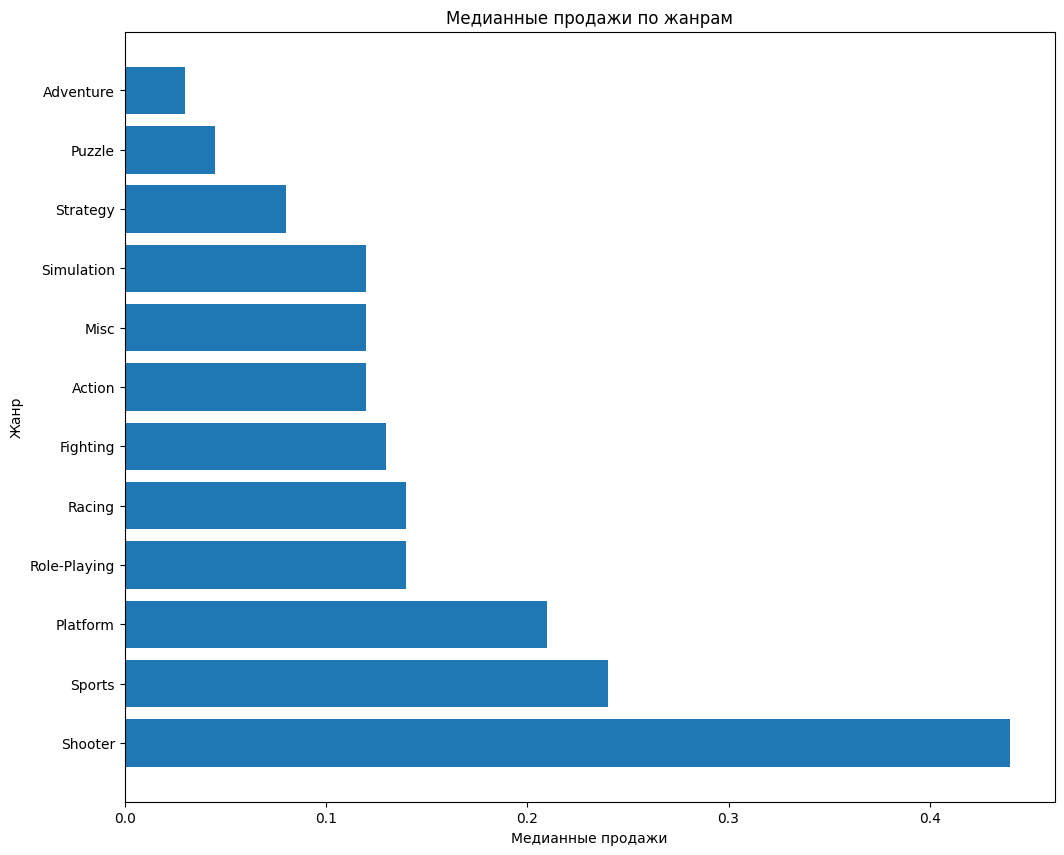

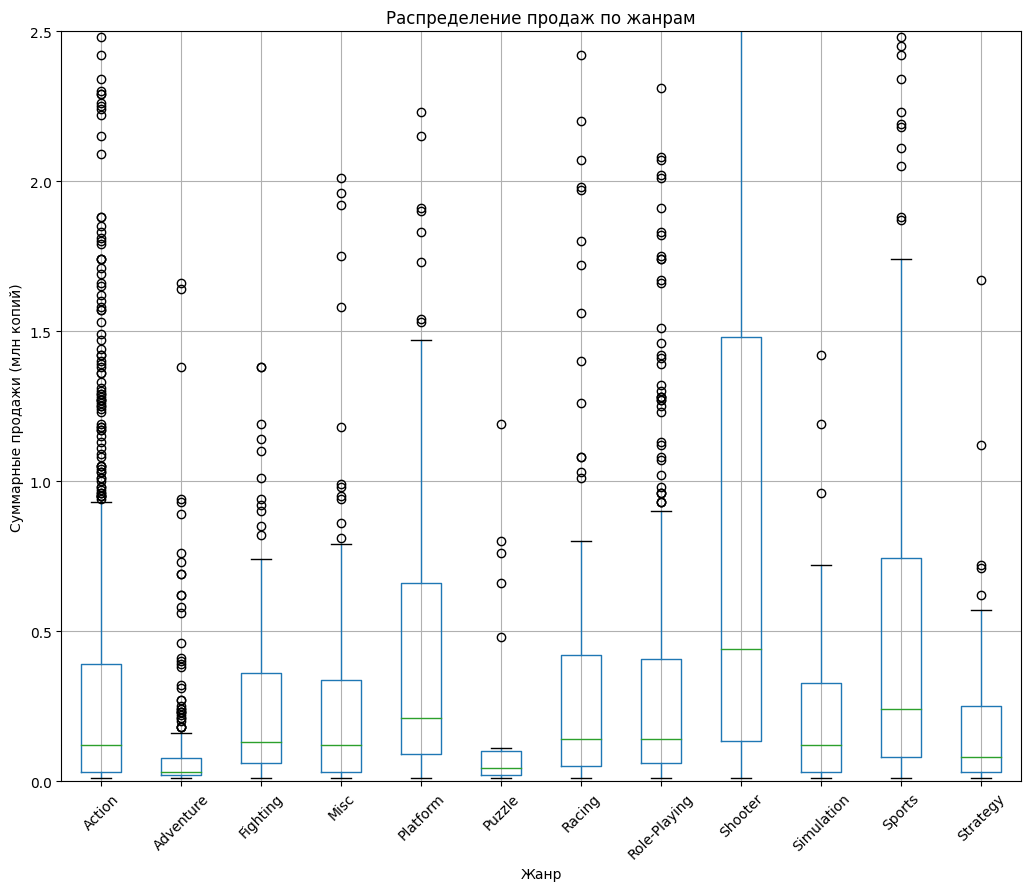

In [57]:
plt.figure(figsize=(12, 10))
# Построение графика общих продаж по жанрам
plt.barh(genre_sales['genre'], genre_sales['sum_sales'])
plt.xlabel('Общие продажи (в млн копий)')
plt.ylabel('Жанр')
plt.title('Общие продажи по жанрам')
plt.show()

# Построение графика количества игр по жанрам
#plt.figure(figsize=(12, 10))
#plt.barh(genre_sales['genre'], genre_sales['game_count'])
#plt.xlabel('Количество игр')
#plt.ylabel('Жанр')
#plt.title('Количество игр по жанрам')
#plt.show()

# Построение графика медианных продаж по жанрам
plt.figure(figsize=(12, 10))
plt.barh(genre_sales['genre'], genre_sales['median_sales'])
plt.xlabel('Медианные продажи')
plt.ylabel('Жанр')
plt.title('Медианные продажи по жанрам')
plt.show()

#Построение диаграммы размаха (boxplot) для продаж по жанрам
data_actual.boxplot(column='sum_sales', by='genre', figsize=(12, 10));
plt.title('Распределение продаж по жанрам')
plt.suptitle('')  # Убираем верхний заголовок
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи (млн копий)')
plt.xticks(rotation=45)  # Поворот подписей на оси X для улучшения читаемости
plt.ylim(0, 2.5)  # Настройка диапазона на оси Y
plt.show();

**Вывод** 
В результате построенных графиков, можно сделать следующие выводы:  

1. Жанры-лидеры по общим продажам это:  

 - Action - 441.12 млн продаж.
 - Shooter - 304.73 млн продаж.
 - Role Playing - 192.80 млн продаж.

2. По медианным продажам жанры распределились следующим образом:  

 - Shooter — лидер по медианным продажам - 0.440 млн.
 - Sports — второй по прибыльности жанр 0.240 млн.
 - Platform - 0.210 млн продаж.

3. Жанры с умеренными и низкими продажами:
Role-Playing и Racing также показывают высокие продажи, что свидетельствует о значительной аудитории этих жанров, хотя они и не лидируют.
Simulation, Action, Fighting, Misc и Strategy — жанры с умеренными продажами, хотя они имеют значительное количество игр. Это может говорить о том, что в этих жанрах есть успешные игры, но в целом они не столь популярны.

6. Жанры с наименьшими продажами:
Adventure и Puzzle имеют низкие средние продажи.

**В итоге,** Shooter, Sports, Platform — это жанры, которые обеспечивают стабильные продажи независимо от платформы. Эти жанры можно считать наиболее прибыльными и они имеют умеренные продажи независимо от платформы. Хотя по общим продажам и количеству игр лидирует Action, скорее всего данный жанр хорошо продается в отдельных платформах.     
Role-Playing и Racing —  также показывают высокие продажи.  
Simulation, Action, Fighting, Misc и Strategy — хотя и не лидируют, но все же имеют значительное количество игр и умеренные продажи, что делает их интересными для определенной аудитории.

**ВЫВОД**  

**1. Общий анализ данных**
- Рост релизов игр: С начала 80-х годов наблюдается активное развитие игровой индустрии, что связано с технологическими улучшениями и ростом доступности видеоигр. В 90-е годы число выпущенных игр резко увеличилось, достигнув пика в 2009 году, чему способствовало развитие интернет-платформ и игровых консолей. С 2010 года наблюдается снижение количества релизов, что может быть связано с насыщением рынка и изменением моделей потребления.
- Актуальный период: Наиболее важными для анализа являются данные за период с 2000 по 2016 годы, поскольку именно в этот период индустрия достигла своего пика, и начался переход к современным платформам и моделям распространения игр.

**2. Анализ платформ**
- Цикл жизни платформ: Популярные платформы имеют жизненный цикл около 7 лет, после чего их сменяют новые версии. Например, PlayStation обновляет свои поколения примерно каждые 7 лет, а предыдущие версии сохраняются на рынке еще около 5 лет. Пик продаж для платформ обычно наступает на 3-5 годы после их выхода.
- Лидеры продаж: В период с 2013 по 2016 годы лидерами продаж стали PS4 и XOne, которые показывают рост. В то же время, платформы PS3 и X360 начали терять позиции, несмотря на большие суммарные продажи, что закономерно, учитывая их присутствие на рынке более 7 лет.

**3. Анализ жанров**
- Лидеры по общим продажам: Самыми прибыльными жанрами по общим продажам стали Action, Shooter и Role-Playing, что свидетельствует об их популярности среди игроков на отдельных платформах.
- Медианные продажи: По медианным продажам лидируют Shooter, Sports и Platform, что говорит о стабильности продаж в этих жанрах и наличии устойчивого спроса.
- Жанры с умеренными и низкими продажами: Жанры Role-Playing и Racing показывают высокие медианные продажи, что свидетельствует о значительной аудитории. Жанры Simulation, Action, Fighting, Misc и Strategy имеют более умеренные продажи, что указывает на наличие как успешных, так и менее популярных игр. Жанры Adventure и Puzzle демонстрируют самые низкие продажи, что может указывать на их нишевый характер.

**4. Влияние отзывов**
- Оценки критиков: Корреляция между оценками критиков и продажами игр положительная, но не сильная. Это говорит о том, что высокие оценки критиков способствуют продажам, но не являются решающим фактором.
- Оценки пользователей: Корреляция между оценками пользователей и продажами еще слабее, что указывает на то, что на решения о покупке влияют другие факторы.

**5. Заключение**
- Прибыльность жанров: Жанры Shooter, Sports и Platform демонстрируют стабильные продажи независимо от платформы, что делает их наиболее прибыльными. Жанры Role-Playing и Racing также показывают высокие продажи, указывая на их значительную аудиторию. Жанры Simulation, Action, Fighting, Misc и Strategy, хотя и не лидируют, все же остаются важными для индустрии за счет наличия как успешных, так и менее популярных игр.
- Перспективные платформы: PS4 и XOne, будучи относительно новыми, показывают наибольшие темпы роста продаж и остаются наиболее перспективными для дальнейшего развития. Старые платформы, такие как PS3 и X360, продолжают приносить доходы, но их пик уже пройден, и они уступают новым поколениям.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Промежуточный вывод после каждого раздела в проекте помогает понять, какие результаты были получены на данном этапе работы и как они соотносятся с целями и задачами раздела. Он может служить отправной точкой для дальнейшего анализа и развития проекта.<br>
Кроме того, промежуточный вывод может помочь убедиться, что все необходимые задания были выполнены и результаты соответствуют целям проекта. Это может предотвратить ошибки и проблемы в дальнейшем процессе работы над проектом.<br>
В целом, написание промежуточного вывода после каждого раздела может быть полезным для понимания прогресса в проекте и обеспечения его качества.<br>
Промежуточный вывод должен содержать следующие основные моменты:<br>
- Краткое описание целей и задач раздела.<br>
- Основные результаты, полученные на данном этапе работы.<br>
- Анализ полученных результатов и их соответствие целям раздела.<br>
- Возможные проблемы и трудности, с которыми столкнулись при выполнении раздела.<br>
- Рекомендации по дальнейшим шагам и развитию проекта.<br>
Промежуточный вывод должен быть кратким и лаконичным, чтобы не перегружать заказчика лишней информацией.</font>

### Шаг 4. Составьте портрет пользователя каждого региона

#### Определите для пользователя каждого региона (NA, EU, JP):

**Самые популярные платформы (топ-5). Опишите различия в долях продаж.**

In [58]:
# Сумма продаж по платформам в регионе NA
na_sales = data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

# Сумма продаж по платформам в регионе EU
eu_sales = data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

# Сумма продаж по платформам в регионе JP
jp_sales = data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Выводим результаты
print("Топ-5 платформ в NA:")
print(na_sales)
print()
print("Топ-5 платформ в EU:")
print(eu_sales)
print()
print("Топ-5 платформ в JP:")
print(jp_sales)

Топ-5 платформ в NA:
platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

Топ-5 платформ в EU:
platform
PS4     141.09
PS3     106.85
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

Топ-5 платформ в JP:
platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64


**Визуализируем данные**

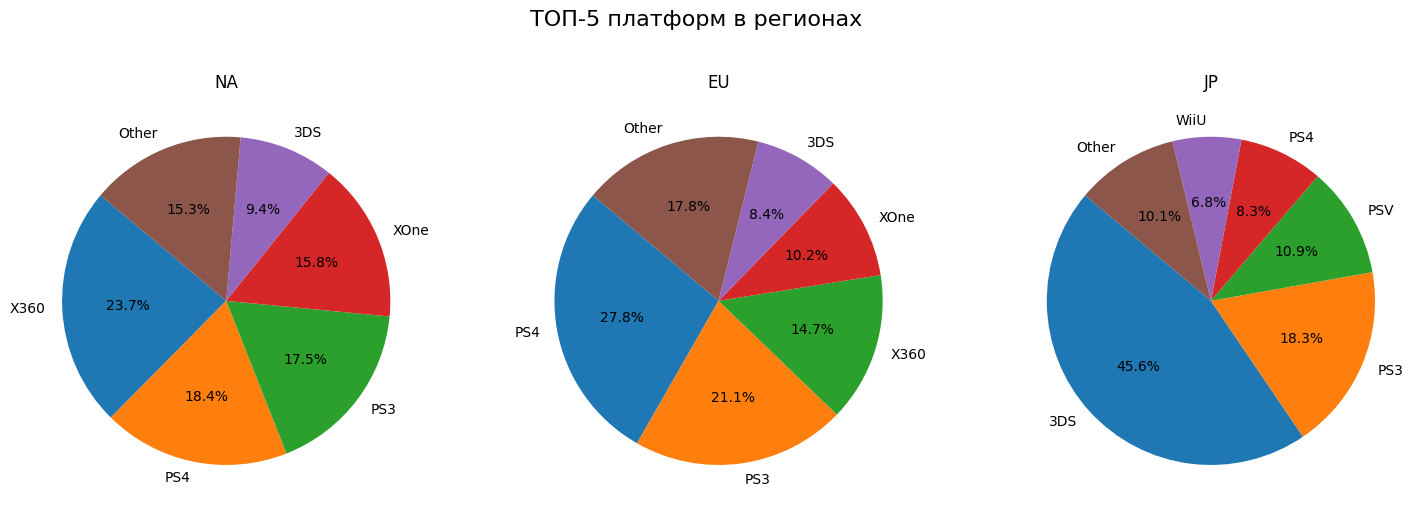

In [59]:
# Функция для создания круговой диаграммы
def pie_chart(ax, data, cat, title):
    other = data_actual.groupby(cat)[data.name].sum().sort_values(ascending=False).iloc[5:].sum()
    data_with_others = data.append(pd.Series({'Other': other}))

    # Построение круговой диаграммы
    ax.pie(data_with_others, labels=data_with_others.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(title)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Топ-5 платформ в NA
pie_chart(axs[0], na_sales, 'platform', 'NA')

# Топ-5 платформ в EU
pie_chart(axs[1], eu_sales, 'platform', 'EU')

# Топ-5 платформ в JP
pie_chart(axs[2], jp_sales, 'platform', 'JP')

fig.suptitle('ТОП-5 платформ в регионах', fontsize=16)
plt.show()

1. Северная Америка (NA): Платформа Xbox 360 (X360) занимает лидирующую позицию. На втором месте PS4. В этом регионе наблюдается сильное предпочтение к платформам от Microsoft и Sony.
2. Европа (EU): Здесь PS4 занимает первое место, а второе место PS3. X360 занимает лишь 3 место. Однако, также можно подчеркнуть, что игроки также предпочитают платформы Sony и Microsoft.
3. Япония (JP): Японский рынок сильно отличается от NA и EU. Здесь лидером является 3DS, занимающий почти половину рынка игроков, на втором месте PS3 и лишь на 3-м месте PSV. Игроки в JP предпочитают портативные платформы, также 3DS  разрабатывается в Японии, что также может объяснить популярность данной системы в этом регионе.

**Самые популярные жанры (топ-5). Поясните разницу.**

In [60]:
na_genres = data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

# Сумма продаж по жанрам в регионе EU
eu_genres = data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

# Сумма продаж по жанрам в регионе JP
jp_genres = data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Выводим результаты
print("Топ-5 жанров в NA:")
print(na_genres)
print("\nТоп-5 жанров в EU:")
print(eu_genres)
print("\nТоп-5 жанров в JP:")
print(jp_genres)

Топ-5 жанров в NA:
genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

Топ-5 жанров в EU:
genre
Action          159.34
Shooter         113.47
Sports           69.08
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

Топ-5 жанров в JP:
genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64


**Визуализируем данные с помощью круговых диаграмм**

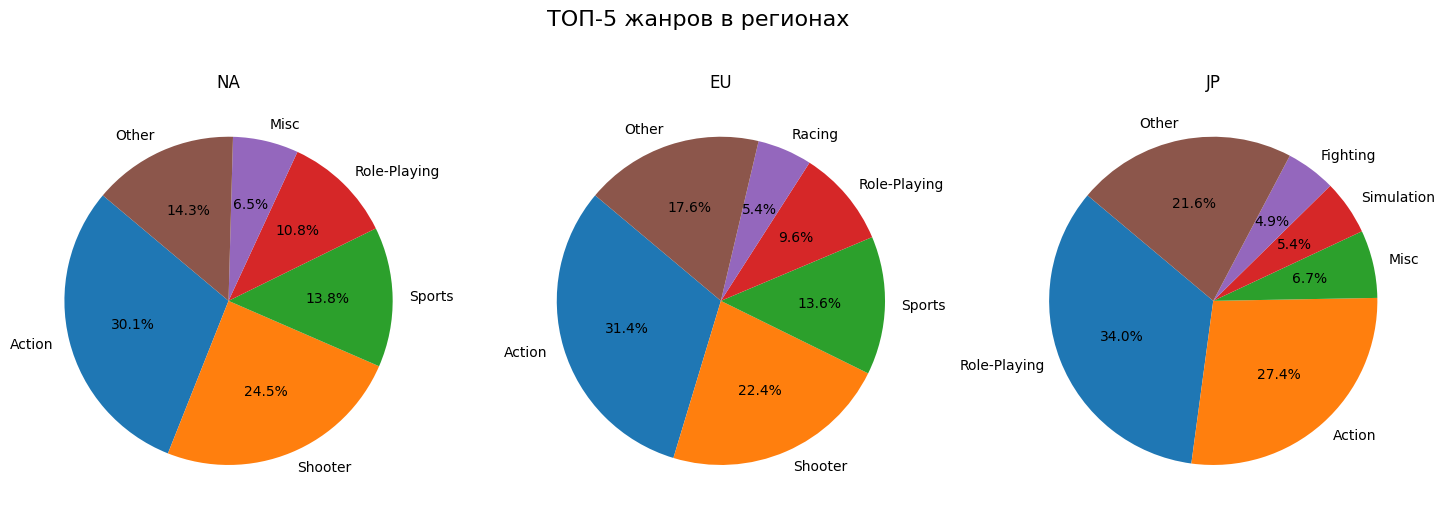

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Топ-5 жанров в NA
pie_chart(axs[0], na_genres, 'genre', 'NA')

# Топ-5 жанров в EU
pie_chart(axs[1], eu_genres, 'genre', 'EU')

# Топ-5 жанров в JP
pie_chart(axs[2], jp_genres, 'genre', 'JP')

fig.suptitle('ТОП-5 жанров в регионах', fontsize=16)
plt.show()


1. Северная Америка и Европа: В обоих регионах жанры Action, Shooter, Sports являются лидерами продаж, что указывает на похожие интересы в этих регионах.

2. Япония: В этом регионе первое место занимает жанр Role-Playing, что контрастирует с NA и EU, так как в этих регионах жанр Role-Playing занимает лишь четвертое место. Это говорит о том, что в Японии игроки предпочитают жанр Role-Playing, однако уже на втором месте размещается жанр Action. Жанр Action также популярен, но его продажи  ниже по сравнению с NA и EU.

**Общие наблюдения:** Жанр Misc присутствуют в топ-5 в NA и JP, но в EU этот жанр не пользуется популярностью. Игроки из EU проявляют интерес к жанру Racing, который не вошел в топ-5 в Северной Америке и Японии.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

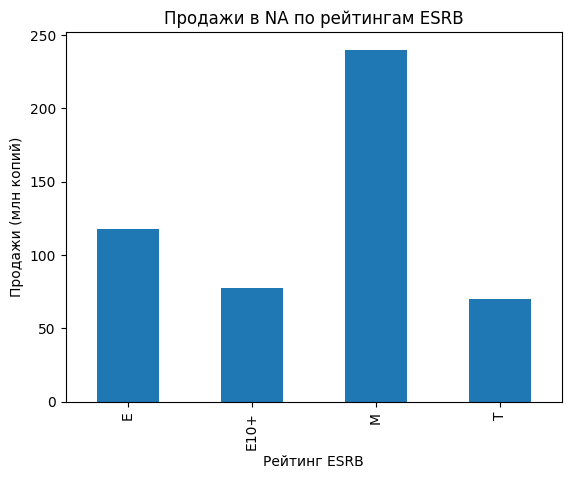

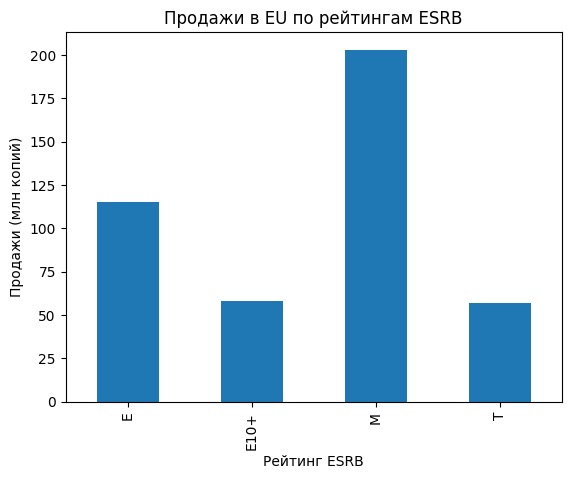

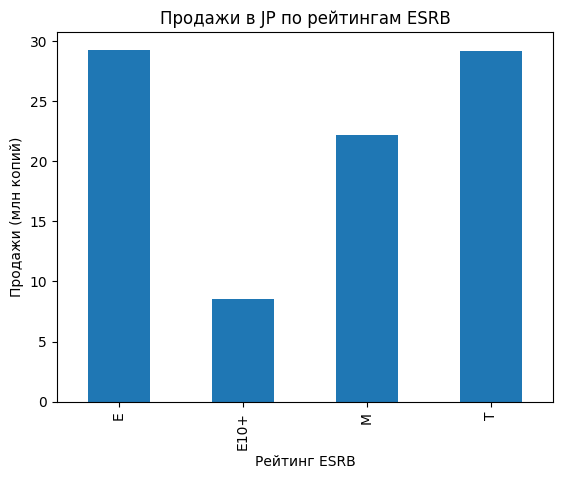

In [62]:
# Группировка данных по рейтингам ESRB и расчет суммарных продаж в каждом регионе
esrb_sales_na = data_actual.groupby('rating')['na_sales'].sum()
esrb_sales_eu = data_actual.groupby('rating')['eu_sales'].sum()
esrb_sales_jp = data_actual.groupby('rating')['jp_sales'].sum()

# Визуализация данных
esrb_sales_na.plot(kind='bar', title='Продажи в NA по рейтингам ESRB', ylabel='Продажи (млн копий)', xlabel='Рейтинг ESRB')
plt.show()

esrb_sales_eu.plot(kind='bar', title='Продажи в EU по рейтингам ESRB', ylabel='Продажи (млн копий)', xlabel='Рейтинг ESRB')
plt.show()

esrb_sales_jp.plot(kind='bar', title='Продажи в JP по рейтингам ESRB', ylabel='Продажи (млн копий)', xlabel='Рейтинг ESRB')
plt.show()

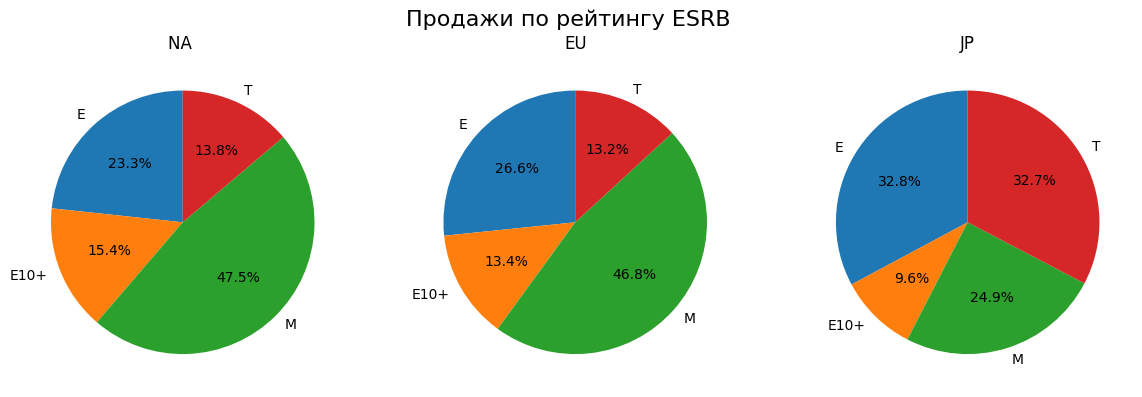

In [63]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
esrb_sales_na.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('NA ')
plt.ylabel('')

# Круговая диаграмма для Европы
plt.subplot(1, 3, 2)
esrb_sales_eu.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('EU')
plt.ylabel('')

# Круговая диаграмма для Японии
plt.subplot(1, 3, 3)
esrb_sales_jp.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('JP')
plt.ylabel('')
fig.suptitle('Продажи по рейтингу ESRB', fontsize=16)
plt.tight_layout()
plt.show()


1. **Северная Америка (NA):**
   - Игры с рейтингом `M` (Mature) занимают лидирующую позицию по продажам, что свидетельствует о популярности игр для взрослых.
   - Значительные продажи также наблюдаются для игр с рейтингами `E` (Everyone) и `E10+` (Everyone 10 and older), что указывает на широкую аудиторию, включая подростков и взрослых.
   - Игры с другими рейтингами продаются заметно хуже.

2. **Европа (EU):**
   - Игры с рейтингом `M` (Mature) также являются наиболее продаваемыми как и в Северной Америке.
   - В Европе также наблюдаются высокие продажи игр с рейтингом `E` (Everyone), что говорит о популярности игр для широкой аудитории.
   - Рейтинг `T`(Teen) и `E10+` (Everyone 10 and older) не такие популярные, что говорит о том, что играы для подростков не пользуются популярностью в этом регионе.

3. **Япония (JP):**
   - В Японии рейтинг `E` и `T`(Teen) являются самыми продаваемыми, что говорит о том, что в этом регионе популярны игры для подростков и для широкой аудитории.
   - Рейтинг `M`, также популярен, что может свидетельствовать о популярности игр для взрослых.
   - Рейтинг `E10+` также имеет вклад в продажи.

**В итоге,** В NA и EU самый популярный рейтинг это `M` (Mature), что говорит о популярности игр для взрослых. На втором месте является рейтинг `E` (Everyone). Процент популярность других рейтингов также практически совпадает. А вот в Японии лидером оказался рейтинг `E` (Everyone), дальше `T`(Teen) и только на третьем месте `M` (Mature). Игры с рейтингом `M` (Mature) лучше продаются в NA и EU, но их продажи в JP значительно ниже. Однако, стоит отметить, что количество игр с классификацией по рейтингу ESRB, отличаются. Так в NA самое большое количество игр с классификацией по рейтингам, в EU по-меньше, а в JP разница в количестве достигает в разы. Это объясняется тем, что ESRB оценивает игры только на американском рынке, а игры выпущенные в EU и JP и, не попавшие, в американский рынок, не могут быть классифицированы этим рейтингом. Поэтому оценивать популярность игр по ESRB будет неправильно для JP и EU. Но особенно для JP. 

**Вывод**  
В ходе анализа данных о продажах компьютерных игр в различных регионах были выявлены особенности рынка в Северной Америке (NA), Европе (EU) и Японии (JP).

1. Самые популярные платформы (топ-5):  

    - В Северной Америке ведущие платформы включают Xbox 360 (X360), PS4, PS3, Wii и PC. Xbox 360 (X360) занимает лидирующую позицию, что указывает на значительное предпочтение пользователей к платформам Microsoft и Sony. Платформы PS3 и Wii, хоть и имеют меньшую долю по сравнению с современными решениями, все еще сохраняют свою актуальность. В целом, рынок демонстрирует лидирующие позиции консолей от Microsoft и Sony.  
    - В Европе PS4 выходит на первое место по продажам, за ним следует PS3 и Xbox 360 (X360). Платформа PS4 показывает наибольший интерес пользователей, в то время как PS3 и Xbox 360 также сохраняют свои позиции, хотя и с меньшей долей рынка. Важно отметить, что пользователи в Европе также проявляют интерес к платформам, разработанным Sony и Microsoft, что подтверждает схожесть предпочтений с Северной Америкой, но с некоторыми отличиями.  
    - Японский рынок отличается предпочтениями в пользу портативных платформ. Здесь 3DS занимает доминирующую позицию, что отражает сильное предпочтение к портативным устройствам, разработанным в Японии. На втором месте находится PS3, а PSV занимает третью позицию. Платформы PS4 и WiiU имеют меньшую долю, что подчеркивает уникальность японского рынка и предпочтение локально разработанных устройств.
  
    
    
2. Самые популярные жанры (топ-5):  

    - В Северной Америке и Европе наибольшую популярность имеют жанры Action, Shooter и Sports. Эти жанры демонстрируют высокие продажи, что указывает на схожесть интересов в этих регионах и предпочтение динамичных и спортивных игр. В Европе также наблюдается высокий интерес к жанру Adventure, что может свидетельствовать о дополнительных предпочтениях пользователей к более глубоким игровым опытам.  
    - В Японии доминирует жанр Role-Playing, что существенно отличается от NA и EU, где этот жанр занимает более низкие позиции. В Японии также популярны жанры Action и Sports, хотя их продажи меньше по сравнению с Северной Америкой и Европой.
  
  
3. Влияние рейтинга ESRB на продажи в отдельном регионе:  

    - Анализ влияния рейтинга ESRB на продажи показал следующие тенденции: в Северной Америке игры с рейтингом M (Mature) являются наиболее продаваемыми, что указывает на высокую популярность игр для взрослой аудитории. Рейтинги E (Everyone) и E10+ (Everyone 10 and older) имеют хорошие продажи, подтверждая широкий интерес к играм для различных возрастных групп. Игры с другими рейтингами имеют менее выраженные продажи.  
    - В Европе также наблюдается доминирование игр с рейтингом M (Mature), что подтверждает схожесть с Северной Америкой. Рейтинг E (Everyone) имеет высокие продажи, что говорит о широком интересе к играм для разных возрастных групп, но рейтинги T (Teen) и E10+ (Everyone 10 and older) менее популярны.  
    - В Японии рейтинг E и T (Teen) занимают лидирующие позиции, что свидетельствует о высоком интересе к играм для подростков и широкой аудитории. Рейтинг M также присутствует на рынке, но в меньшей степени по сравнению с NA и EU. Рейтинг E10+ также имеет вклад в общий объем продаж, что отражает интерес к играм для всех возрастных групп. Однако, количество игр, классифицированных по рейтингу ESRB, различается между регионами. В Северной Америке наблюдается наибольшее количество игр с классификацией, в Европе — меньше, а в Японии еще большая разница. Это объясняется тем, что ESRB оценивает игры только для американского рынка, и игры, выпущенные в Европе и Японии, которые не попадают на американский рынок, не могут быть классифицированы ESRB. Поэтому использование рейтингов ESRB для оценки популярности игр в Японии и Европе может быть неправильным, особенно в Японии, где количество игр с этой классификацией значительно меньше.

### Шаг 5. Проверьте гипотезы

**Гипотеза 1:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- **Нулевая гипотеза (H₀):** Средние пользовательские рейтинги для Xbox One и PC одинаковы.
- **Альтернативная гипотеза (H₁):** Средние пользовательские рейтинги для Xbox One и PC различаются.

**Гипотеза 2:** Средние пользовательские рейтинги жанров Action и Sports разные

- **Нулевая гипотеза (H₀):** Средние пользовательские рейтинги для жанров Action и Sports одинаковы.
- **Альтернативная гипотеза (H₁):** Средние пользовательские рейтинги для жанров Action и Sports различаются.

In [64]:
print('Нулевая гипотеза: Средние пользовательские рейтинги для Xbox One и PC одинаковы.')

xbox_one_ratings = data_actual[data_actual['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = data_actual[data_actual['platform'] == 'PC']['user_score'].dropna()

print(f"\nСредний пользовательский рейтинг для игр на платформе Xbox One: {xbox_one_ratings.mean()}")
print(f"Средний пользовательский рейтинг для игр на платформе PC: {pc_ratings.mean()}")

# Проверка гипотезы 1: Средние пользовательские рейтинги платформ Xbox One и PC
t_stat_1, p_value_1 = st.ttest_ind(xbox_one_ratings, pc_ratings)

# Вывод результата
print(f"Гипотеза 1: p-value = {p_value_1}")

action_ratings = data_actual[data_actual['genre'] == 'Action']['user_score'].dropna()
sports_ratings = data_actual[data_actual['genre'] == 'Sports']['user_score'].dropna()

print('\n\nНулевая гипотеза: Средние пользовательские рейтинги для жанров Action и Sports одинаковы.')

print(f"\nСредний пользовательский рейтинг игр в жанре Action: {action_ratings.mean()}")
print(f"Средний пользовательский рейтинг игр в жанре Sports: {sports_ratings.mean()}")

# Проверка гипотезы 2: Средние пользовательские рейтинги жанров Action и Sports
t_stat_2, p_value_2 = st.ttest_ind(action_ratings, sports_ratings)

# Вывод результата
print(f"Гипотеза 2: p-value = {p_value_2}")

Нулевая гипотеза: Средние пользовательские рейтинги для Xbox One и PC одинаковы.

Средний пользовательский рейтинг для игр на платформе Xbox One: 6.521428571428572
Средний пользовательский рейтинг для игр на платформе PC: 6.4286407766990274
Гипотеза 1: p-value = 0.5535080500643661


Нулевая гипотеза: Средние пользовательские рейтинги для жанров Action и Sports одинаковы.

Средний пользовательский рейтинг игр в жанре Action: 6.825047801147227
Средний пользовательский рейтинг игр в жанре Sports: 5.455670103092784
Гипотеза 2: p-value = 4.8045233804629176e-26


1. Для проверки обеих гипотез использовали t-критерий Стьюдента для независимых выборок. Этот критерий подходит, так как:  

- Мы сравниваем средние значения двух независимых групп (платформы или жанры).
- Размер выборки достаточно велик для применения центральной предельной теоремы.
   
2. Выбор уровня значимости (alpha)
Обычно выбирается уровень значимости alpha = 0.05 (5%). Это означает, что мы готовы принять вероятность ошибки первого рода (ложное отклонение нулевой гипотезы) на уровне 5%, то есть в 1 из 20 случаев, соглашаемся что будет ошибка. 

3. Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
p-value = 0.5535080500643661  
Это значение больше уровня значимости alpha = 0.05.
Вывод: Не можем отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC статистически значимо не различаются, и можно считать, что они примерно одинаковы..

4. Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные
p-value = 4.8045233804629176e-26
Это значение меньше уровня значимости alpha = 0.05.
Вывод: Отвергаем нулевую гипотезу. Существуют различия в средних пользовательских рейтингах между жанрами Action и Sports, их средние отличаются.

### Шаг 6. Напишите общий вывод

В рамках проведенного анализа данных интернет-магазина «Стримчик», занимающегося продажей компьютерных игр, были достигнуты следующие ключевые результаты:  

1. Предобработка данных

    - **Столбцы:** Все наименования столбцов приведены к нижнему регистру, а типы данных преобразованы для обеспечения корректного анализа.
    - **Пропуски:** Пропуски в данных были обработаны с использованием доступной информации. Значения "tbd" заменены на NaN для дальнейшей обработки. Удалены строки с пропусками столбца `year_of_release`, так как пропуски составляли всего лишь 1.6% от общего числа данных. Поэтому удаление этих данных не повлияет на дальнейший анализ. В столбце `user_score` значения nan оставлены как есть, во избежание искажений данных. В столбце `critic_score` больше половины значений отсутствуют, поэтому во избежание искажений при анализе и обработке данных, заполнять значения медианой, средней или модой не стоит. Оставлены значения NaN.
    - **Заполнение пропусков:** Пропуски в столбце `rating` были заполнены на основе данных других платформ. А оставшаяся часть удалена.
    - **Суммарные продажи:** Посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец `sum_sales`.

2. Анализ продаж по платформам

    - PS4 и XOne, будучи относительно новыми, показывают наибольшие темпы роста продаж и остаются наиболее перспективными для дальнейшего развития. Старые платформы, такие как PS3 и X360, продолжают приносить доходы, но их пик уже пройден, и они уступают новым поколениям.

3. Влияние оценок на продажи

    - **Оценки критиков:** Корреляция между оценками критиков и продажами игр положительная, но не сильная. Это говорит о том, что высокие оценки критиков способствуют продажам, но не являются решающим фактором.
    - **Оценки пользователей:** Корреляция между оценками пользователей и продажами крайне слабая, что говорит о незначительном влиянии пользовательских оценок на продажи.

4. Жанровый анализ

    - **Популярные жанры:** Жанры Shooter, Sports и Platform демонстрируют стабильные продажи независимо от платформы, что делает их наиболее прибыльными. Жанры Role-Playing и Racing также показывают высокие продажи, указывая на их значительную аудиторию. Жанры Simulation, Action, Fighting, Misc и Strategy, хотя и не лидируют, все же остаются важными для индустрии за счет наличия как успешных, так и менее популярных игр.
    - Медианные продажи: По медианным продажам лидируют Shooter, Sports и Platform, что говорит о стабильности продаж в этих жанрах и наличии устойчивого спроса.
    - Жанры с умеренными и низкими продажами: Жанры Role-Playing и Racing показывают высокие медианные продажи, что свидетельствует о значительной аудитории. Жанры Simulation, Action, Fighting, Misc и Strategy имеют более умеренные продажи, что указывает на наличие как успешных, так и менее популярных игр. Жанры Adventure и Puzzle демонстрируют самые низкие продажи, что может указывать на их нишевый характер.

5. Анализ по регионам

    - **Северная Америка и Европа:** В этих регионах наблюдается доминирование жанров Action и Sports, при этом в NA шутеры показывают высокие продажи.
    - **Япония:** Жанр Role-Playing является наиболее популярным, что отражает культурные предпочтения японских игроков.

6. Анализ по рейтингам
    - ESRB оценивает игры только для американского рынка, и игры, выпущенные в Европе и Японии, которые не попадают на американский рынок, не могут быть классифицированы ESRB. Однако, если рассматривать только игры попадающие на американский рынок и в то же время на европейский, то можно сделать вывод, что самый популярный рейтинг - это M (Mature), а дальше идет E (Everyone). Для японского рынка, популярные рейтинги - E и T (Teen), с учетом того, что классификация идет только для иггр, попавших н американский рынок. 

7. Статистические гипотезы

    - **Гипотеза 1:** Средние пользовательские рейтинги платформ Xbox One и PC статистически значимо не различаются (p-value = 0.553). Это значение больше уровня значимости α = 0.05, что позволяет считать, что средние пользовательские рейтинги этих платформ примерно одинаковы.
    - **Гипотеза 2:** Средние пользовательские рейтинги жанров Action и Sports различаются. Значение p-value составляет 4.80e-26, что меньше уровня значимости α = 0.05. Это указывает на статистически значимое различие в средних пользовательских рейтингах между жанрами Action и Sports.  

На основе проведенного анализа данных можно сделать следующие рекомендации:

1. **Продвижение игр по жанрам и платформам:**
   - **Жанры:** Сосредоточиться на продвижении игр жанров Shooter, Sports и Platform, так как они демонстрируют стабильные продажи для всех платформ.
   - **Платформы:** Особое внимание следует уделить новым платформам от Microsoft и Sony, которые показывают высокие результаты по суммарным и средним продажам игр.

2. **Региональные кампании:**
   - **Северная Америка и Европа:** Учитывать предпочтения пользователей в этих регионах, акцентируя внимание на жанрах Action, Shooter и Sports.
   - **Япония:** В этом регионе следует уделить больше внимания жанрам Role-Playing и адаптировать стратегии к уникальным предпочтениям японских игроков.
   - **Рейтинги ESRB:** При планировании рекламных кампаний важно учитывать, что в NA и EU высокие продажи наблюдаются для игр с рейтингами M и E, тогда как в JP рейтинг E и T является наиболее популярным.

3. **Качество критических обзоров:**
   - Поскольку оценки критиков оказывают умеренное влияние на продажи игр, рекомендуется уделять внимание качеству критических обзоров. Положительные обзоры могут способствовать увеличению продаж за счет улучшения репутации игр. 